## Let's first import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sb
import plotly.graph_objects as go

In [17]:
df = pd.read_csv('./dataset/Parco_Veicoli.csv')
df

/var/folders/81/f9z4jcsj7gz1v7bs26nb55jm0000gn/T/ipykernel_19518/1160917084.py:1: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/Parco_Veicoli.csv')


,PROGRESSIVO,TIPO_TARGA,UTILIZZO,SPECIALITA,RIMORCHIABILITA,CILIDRATA,ALIMENTAZIONE,PORTATA,NUM_POSTI,TIPO_IMPIANTO,DISISTALLAZIONE_IMPIANTO,KW,ANNO_IMMATRICOLAZIONE,NUM_ASSI,EURO,CO2,PESO_COMPLESSIVO,CAP_RESIDENZA_PROPR,PROV_RESIDENZA
0,1,3,4,NaN,N,NaN,NaN,800.0,000,NaN,NaN,NaN,1998,2.0,0,NaN,1200.0,89046.0,RC
1,2,1,PV,NaN,NaN,1698.0,GA,385.0,005,NaN,NaN,51.0,1998,2.0,2,0.0,1510.0,88046.0,CZ
2,3,1,5,NaN,NaN,14618.0,GA,16730.0,003,NaN,NaN,320.0,1998,4.0,2,0.0,32000.0,87036.0,CS
3,4,1,5,NaN,NaN,13798.0,GA,11450.0,002,NaN,NaN,309.0,1998,3.0,2,0.0,26000.0,88060.0,CZ
4,5,1,0,NaN,NaN,1998.0,BE,500.0,005,NaN,NaN,137.0,1998,2.0,2,0.0,2010.0,87036.0,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433489,1433490,1,PV,NaN,S,NaN,ELE,00515,5.0,NaN,NaN,127.0,2023,2.0,NE,NaN,2895.0,88040.0,CZ
1433490,1433491,1,6,NaN,N,12902.0,G,13100,3.0,NaN,NaN,300.0,2008,3.0,4,NaN,26000.0,88100.0,CZ
1433491,1433492,1,NR,PIA,S,2488.0,G,NaN,3.0,NaN,NaN,81.0,2011,2.0,4,NaN,3500.0,87050.0,CS
1433492,1433493,1,NC,NaN,S,12740.0,G,04200,55.0,NaN,NaN,324.0,2013,2.0,5,NaN,18000.0,89824.0,VV


## Now it's time to prepare the data for the model

In [18]:
# change the column names into lowercase
df.columns = df.columns.str.lower()
df

,progressivo,tipo_targa,utilizzo,specialita,rimorchiabilita,cilidrata,alimentazione,portata,num_posti,tipo_impianto,disistallazione_impianto,kw,anno_immatricolazione,num_assi,euro,co2,peso_complessivo,cap_residenza_propr,prov_residenza
0,1,3,4,NaN,N,NaN,NaN,800.0,000,NaN,NaN,NaN,1998,2.0,0,NaN,1200.0,89046.0,RC
1,2,1,PV,NaN,NaN,1698.0,GA,385.0,005,NaN,NaN,51.0,1998,2.0,2,0.0,1510.0,88046.0,CZ
2,3,1,5,NaN,NaN,14618.0,GA,16730.0,003,NaN,NaN,320.0,1998,4.0,2,0.0,32000.0,87036.0,CS
3,4,1,5,NaN,NaN,13798.0,GA,11450.0,002,NaN,NaN,309.0,1998,3.0,2,0.0,26000.0,88060.0,CZ
4,5,1,0,NaN,NaN,1998.0,BE,500.0,005,NaN,NaN,137.0,1998,2.0,2,0.0,2010.0,87036.0,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433489,1433490,1,PV,NaN,S,NaN,ELE,00515,5.0,NaN,NaN,127.0,2023,2.0,NE,NaN,2895.0,88040.0,CZ
1433490,1433491,1,6,NaN,N,12902.0,G,13100,3.0,NaN,NaN,300.0,2008,3.0,4,NaN,26000.0,88100.0,CZ
1433491,1433492,1,NR,PIA,S,2488.0,G,NaN,3.0,NaN,NaN,81.0,2011,2.0,4,NaN,3500.0,87050.0,CS
1433492,1433493,1,NC,NaN,S,12740.0,G,04200,55.0,NaN,NaN,324.0,2013,2.0,5,NaN,18000.0,89824.0,VV


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433494 entries, 0 to 1433493
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   progressivo               1433494 non-null  int64  
 1   tipo_targa                1433494 non-null  int64  
 2   utilizzo                  1433475 non-null  object 
 3   specialita                19609 non-null    object 
 4   rimorchiabilita           921586 non-null   object 
 5   cilidrata                 1408879 non-null  float64
 6   alimentazione             1411074 non-null  object 
 7   portata                   1431120 non-null  object 
 8   num_posti                 1431699 non-null  object 
 9   tipo_impianto             60800 non-null    object 
 10  disistallazione_impianto  53 non-null       object 
 11  kw                        1411419 non-null  float64
 12  anno_immatricolazione     1433494 non-null  int64  
 13  num_assi                  1

In [138]:
df.shape

(1433494, 19)

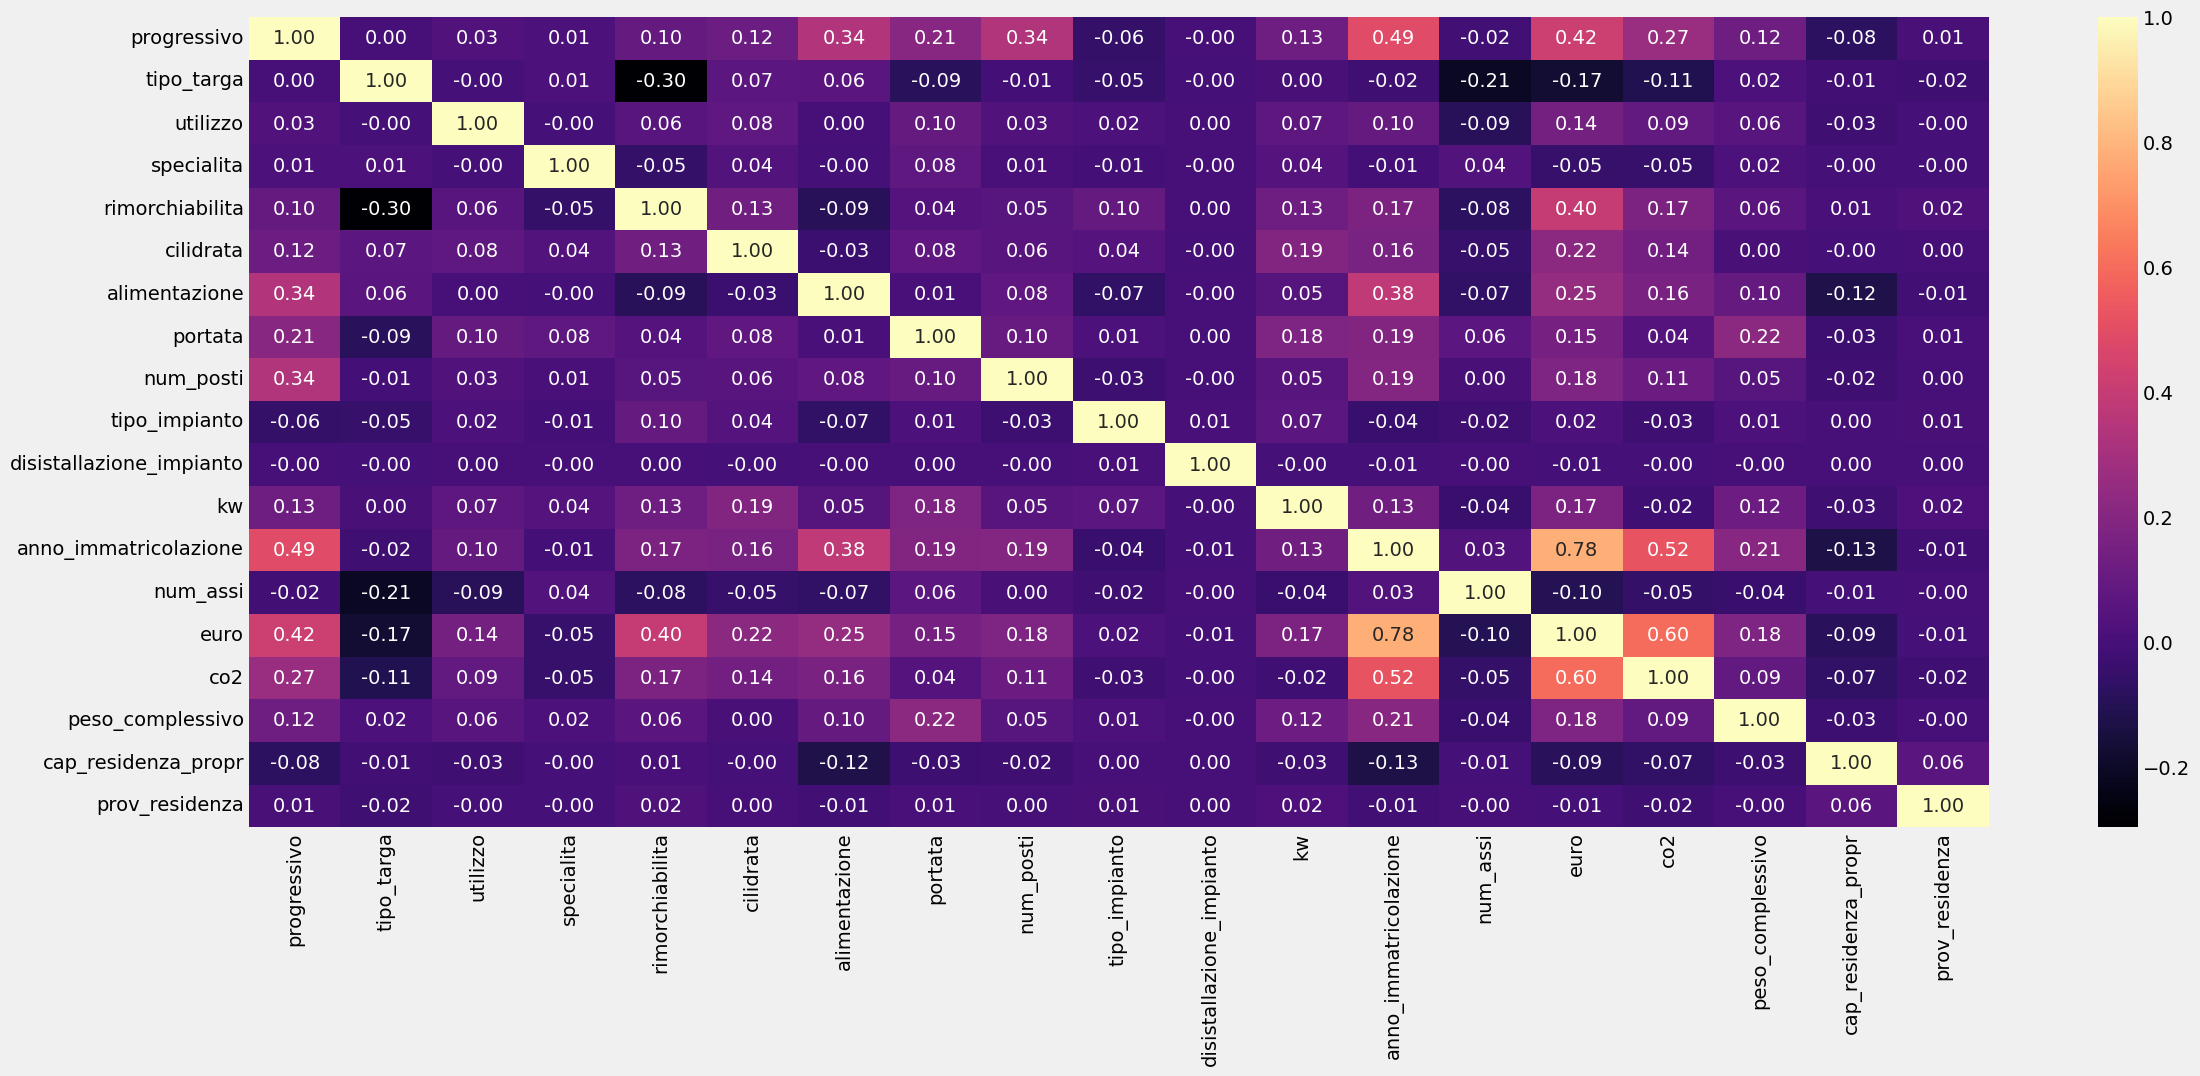

In [139]:
df_heatmap = df.copy()

# Manually encode each column
for column in df.columns:
    unique_values = df[column].unique()
    value_mapping = {value: index for index, value in enumerate(unique_values)}
    df_heatmap[column] = df[column].map(value_mapping)


plt.figure(figsize=(25, 10))
sb.heatmap(df_heatmap.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

In [19]:
df = df[~((df["co2"] == 0) & (df["alimentazione"] != "ELE"))].copy()

df.loc[df["alimentazione"] == "ELE", "co2"] = df.loc[df["alimentazione"] == "ELE", "co2"].fillna(0)

df.dropna(subset=["prov_residenza", "alimentazione", "anno_immatricolazione", "co2"], inplace=True)

df.loc[df["alimentazione"] == "ELE", "co2"]

866548     0.0
916685     0.0
1016953    0.0
1021838    0.0
1028143    0.0
          ... 
1433342    0.0
1433343    0.0
1433398    0.0
1433409    0.0
1433489    0.0
Name: co2, Length: 1920, dtype: float64

In [20]:
# We calculate the total number of cars for each combination of prov_residenza and anno_immatricolazione and divide by the number of electric car
# to obtain the ratio of the electric car over the years


total_cars_per_group = df.groupby(['prov_residenza', 'anno_immatricolazione']).size().reset_index(name='total_cars')

electric_cars_per_group = df[df['alimentazione'] == 'ELE'].groupby(['prov_residenza', 'anno_immatricolazione']).size().reset_index(name='electric_cars')

merged_df = pd.merge(total_cars_per_group, electric_cars_per_group, on=['prov_residenza', 'anno_immatricolazione'], how='left')

merged_df['electric_cars'] = merged_df['electric_cars'].fillna(0)

merged_df['ratio_electric'] = merged_df['electric_cars'] / merged_df['total_cars']

df = pd.merge(df, merged_df[['prov_residenza', 'anno_immatricolazione', 'ratio_electric']], on=['prov_residenza', 'anno_immatricolazione'], how='left')


In [21]:
df_base = df[["prov_residenza", "anno_immatricolazione", "co2", "ratio_electric"]]

df_base

,prov_residenza,anno_immatricolazione,co2,ratio_electric
0,CZ,1998,1960.0,0.000000
1,CS,1998,1640.0,0.000000
2,CS,1998,1640.0,0.000000
3,KR,1998,1600.0,0.000000
4,CS,1998,1640.0,0.000000
...,...,...,...,...
1135852,RC,2011,1100.0,0.000000
1135853,KR,2024,1050.0,0.017735
1135854,RC,2019,1110.0,0.001106
1135855,CS,2020,520.0,0.005140


In [22]:
df = df_base.groupby(["prov_residenza", "anno_immatricolazione"])["co2"].mean().round(0).astype(int).reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   prov_residenza         135 non-null    object
 1   anno_immatricolazione  135 non-null    int64 
 2   co2                    135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [46]:
df_electric = merged_df[['prov_residenza', 'anno_immatricolazione', 'ratio_electric']].copy()
df_electric

,prov_residenza,anno_immatricolazione,ratio_electric
0,CS,1998,0.000000
1,CS,1999,0.000000
2,CS,2000,0.000000
3,CS,2001,0.000000
4,CS,2002,0.000000
...,...,...,...
130,VV,2020,0.003982
131,VV,2021,0.002698
132,VV,2022,0.014375
133,VV,2023,0.017720


## Define the model

### SKLearn

In [143]:
x_train = df[(df["anno_immatricolazione"] != 2024)]
y_train = x_train["co2"]

x_test = df[(df["anno_immatricolazione"] == 2024)]
y_test = x_test["co2"]

encoder = OneHotEncoder(sparse_output=False)
prov_encoded = encoder.fit_transform(x_train[["prov_residenza"]])
prov_test_encoded = encoder.fit_transform(x_test[["prov_residenza"]])

encoder.fit(np.concatenate([x_train[["anno_immatricolazione"]],x_test[["anno_immatricolazione"]]]))
anno_imm = encoder.transform(x_train[["anno_immatricolazione"]])
anno_imm_test = encoder.transform(x_test[["anno_immatricolazione"]])

x_train = np.concatenate([prov_encoded, anno_imm], axis = 1)
x_test = np.concatenate([prov_test_encoded, anno_imm_test], axis=1)

y_train = np.array(y_train)
y_test = np.array(y_test)

/Users/pietro/Library/Caches/pypoetry/virtualenvs/accenture-challenge-_ZJ9eJn8-py3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names

/Users/pietro/Library/Caches/pypoetry/virtualenvs/accenture-challenge-_ZJ9eJn8-py3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names



In [144]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [145]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [146]:
model.score(x_train, y_train)

0.9959513545036316

In [147]:
model.predict(x_test)

array([1316.3846, 1317.4615, 1335.3845, 1305.6539, 1311.6538],
      dtype=float32)

In [148]:
y_test

array([1152., 1151., 1141., 1085., 1152.], dtype=float32)

### Torch

In [149]:
class Regressor(nn.Module):
    
    def __init__(self, input_size):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1)
        )
        
        for layer in self.model:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)

    def forward(self, input):
        return self.model(input)
    
    def train_model(self, x_train, y_train, epochs=20, lr=0.01, mode = True):
        super().train(mode)
        losses = []
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        for epoch in range(epochs):
            optimizer.zero_grad()

            x_hat = self.forward(x_train)

            loss = criterion(x_hat, y_train)

            loss.backward()

            optimizer.step()

            losses.append(loss.item())

            # if epoch % 5 == 0:
            #     print(f"Epoch: {epoch}, loss: {loss.item()}")

        
        plt.style.use('fivethirtyeight')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')

        # Plotting the last 150 values
        plt.plot(losses[-150:])
        plt.show()


In [150]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

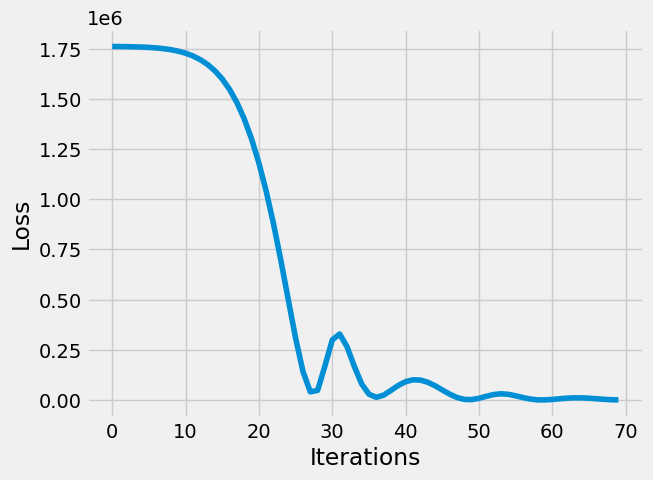

In [151]:
reg = Regressor(x_train.shape[1])
reg.train_model(x_train=x_train_tensor, y_train=y_train_tensor.unsqueeze(1), epochs=70, lr=0.01)


In [152]:
reg.eval()
reg(x_train_tensor)

tensor([[1656.2198],
        [1621.0389],
        [1576.9138],
        [1576.2256],
        [1551.3387],
        [1502.7661],
        [1444.4283],
        [1434.5781],
        [1432.2468],
        [1429.2979],
        [1412.7474],
        [1347.4574],
        [1303.9261],
        [1264.3881],
        [1242.9995],
        [1193.9286],
        [1162.5947],
        [1135.8153],
        [1110.6665],
        [1102.3878],
        [1133.8387],
        [1196.6136],
        [1119.5836],
        [1243.9232],
        [1175.9652],
        [1179.3390],
        [1660.2198],
        [1626.7075],
        [1578.0176],
        [1575.0247],
        [1555.9567],
        [1504.9838],
        [1451.4027],
        [1439.2374],
        [1434.3990],
        [1437.0975],
        [1420.7129],
        [1358.8157],
        [1309.4850],
        [1271.6500],
        [1241.0450],
        [1201.2156],
        [1179.0394],
        [1142.6976],
        [1120.7208],
        [1116.3512],
        [1139.5072],
        [1198

In [153]:
co2_per_provincia_anno = df.groupby(['prov_residenza', 'anno_immatricolazione'])['co2'].mean().unstack()


fig = go.Figure()

for provincia in co2_per_provincia_anno.index:
    fig.add_trace(go.Scatter(
        x=co2_per_provincia_anno.columns,
        y=co2_per_provincia_anno.loc[provincia],
        mode='lines+markers',
        name=provincia
    ))

fig.update_layout(
    title='Andamento delle Emissioni di CO2 per Anno e Provincia',
    xaxis_title='Anno di Immatricolazione',
    yaxis_title='Emissioni di CO2 (media)',
    legend_title='Provincia'
)

fig.show()

In [154]:
reg.eval()
with torch.no_grad():
    predictions = reg(x_train_tensor).numpy().reshape(-1)

x_test_df = df[df["anno_immatricolazione"] != 2024].copy()

x_test_df['predicted_co2'] = predictions

grouped_pred = x_test_df.groupby(['prov_residenza', 'anno_immatricolazione'])['predicted_co2'].mean().reset_index()

fig_plotly = go.Figure()
for prov in grouped_pred['prov_residenza'].unique():
    df_prov = grouped_pred[grouped_pred['prov_residenza'] == prov]
    fig_plotly.add_trace(go.Scatter(
        x=df_prov['anno_immatricolazione'],
        y=df_prov['predicted_co2'],
        mode='lines+markers',
        name=prov
    ))

fig_plotly.update_layout(
    title="Andamento delle emissioni di CO2 predette per Provincia (Torch)",
    xaxis_title="Anno di Immatricolazione",
    yaxis_title="CO2 Predetta"
)

fig_plotly.show()

In [155]:
pred_sk = model.predict(x_train)

df_train = df[df["anno_immatricolazione"] != 2024].copy()
df_train['predicted_co2'] = pred_sk

grouped_pred_sk = df_train.groupby(['prov_residenza', 'anno_immatricolazione'])['predicted_co2'].mean().reset_index()


fig_sklearn = go.Figure()
for prov in grouped_pred_sk['prov_residenza'].unique():
    df_prov = grouped_pred_sk[grouped_pred_sk['prov_residenza'] == prov]
    fig_sklearn.add_trace(go.Scatter(
        x=df_prov['anno_immatricolazione'],
        y=df_prov['predicted_co2'],
        mode='lines+markers',
        name=prov
    ))

fig_sklearn.update_layout(
    title="Andamento delle emissioni di CO2 predette per Provincia (sklearn)",
    xaxis_title="Anno di Immatricolazione",
    yaxis_title="CO2 Predetta"
)
fig_sklearn.show()

### Now let's evaluate the ratio of the electric car per province

In [ ]:
electric_ratio = df_electric.pivot(index='prov_residenza', columns='anno_immatricolazione', values='ratio_electric')


fig = go.Figure()

for provincia in electric_ratio.index:
    fig.add_trace(go.Scatter(
        x=electric_ratio.columns,
        y=electric_ratio.loc[provincia],
        mode='lines+markers',
        name=provincia
    ))

fig.update_layout(
    title='Andamento ratio macchine elettriche per provincia',
    xaxis_title='Anno di Immatricolazione',
    yaxis_title='% macchine elettriche',
    legend_title='Provincia'
)

fig.show()

In [53]:
x_train = df_electric[(df_electric["anno_immatricolazione"] != 2024)]
y_train = x_train["ratio_electric"]

x_test = df_electric[(df_electric["anno_immatricolazione"] == 2024)]
y_test = x_test["ratio_electric"]

encoder = OneHotEncoder(sparse_output=False)
prov_encoded = encoder.fit_transform(x_train[["prov_residenza"]])
prov_test_encoded = encoder.fit_transform(x_test[["prov_residenza"]])

encoder.fit(np.concatenate([x_train[["anno_immatricolazione"]],x_test[["anno_immatricolazione"]]]))
anno_imm = encoder.transform(x_train[["anno_immatricolazione"]])
anno_imm_test = encoder.transform(x_test[["anno_immatricolazione"]])

x_train = np.concatenate([prov_encoded, anno_imm], axis = 1)
x_test = np.concatenate([prov_test_encoded, anno_imm_test], axis=1)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

/Users/ciccio/Library/Caches/pypoetry/virtualenvs/accenture-challenge-QGHO62Cj-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names

/Users/ciccio/Library/Caches/pypoetry/virtualenvs/accenture-challenge-QGHO62Cj-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but OneHotEncoder was fitted without feature names



In [63]:
model_2 = LinearRegression()
model_2.fit(x_train, y_train)

LinearRegression()

In [64]:
model_2.score(x_train, y_train)

0.9558073282241821

In [65]:
model_2.predict(x_test)

array([0.00220203, 0.00205889, 0.00146798, 0.00172901, 0.00160572],
      dtype=float32)

In [58]:
y_test

array([0.01703596, 0.02140428, 0.01773533, 0.01698682, 0.0123839 ],
      dtype=float32)

In [68]:
pred_sk = model_2.predict(x_train)

df_train = df[df["anno_immatricolazione"] != 2024].copy()
df_train['predicted_ele_ratio'] = pred_sk

grouped_pred_sk = df_train.groupby(['prov_residenza', 'anno_immatricolazione'])['predicted_ele_ratio'].mean().reset_index()


fig_sklearn = go.Figure()
for prov in grouped_pred_sk['prov_residenza'].unique():
    df_prov = grouped_pred_sk[grouped_pred_sk['prov_residenza'] == prov]
    fig_sklearn.add_trace(go.Scatter(
        x=df_prov['anno_immatricolazione'],
        y=df_prov['predicted_ele_ratio'],
        mode='lines+markers',
        name=prov
    ))

fig_sklearn.update_layout(
    title='Andamento ratio macchine elettriche per provincia',
    xaxis_title='Anno di Immatricolazione',
    yaxis_title='% macchine elettriche',
    legend_title='Provincia'
)

fig_sklearn.show()